In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:05<00:00, 29202531.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(8, 8, 3, stride=1, padding=0),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 8, 3, stride=1, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 3, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = AutoEncoder()


Epoch 1, Loss: 0.01629225739091635
Epoch 2, Loss: 0.005427001683972776
Epoch 3, Loss: 0.003943345241714269
Epoch 4, Loss: 0.0033113433769904077
Epoch 5, Loss: 0.0028089912040159108
Epoch 6, Loss: 0.0026312888623215257
Epoch 7, Loss: 0.0025068884291686118
Epoch 8, Loss: 0.0024157082717865706
Epoch 9, Loss: 0.002347056205617264
Epoch 10, Loss: 0.0022947023469023406
Epoch 11, Loss: 0.002244239563122392
Epoch 12, Loss: 0.002207419451093301
Epoch 13, Loss: 0.0021750969775021075
Epoch 14, Loss: 0.00214743006718345
Epoch 15, Loss: 0.002116917659062892
Epoch 16, Loss: 0.002096567576285452
Epoch 17, Loss: 0.002072674514492974
Epoch 18, Loss: 0.0020534076928161085
Epoch 19, Loss: 0.0020335656413808466
Epoch 20, Loss: 0.0020232115096878263


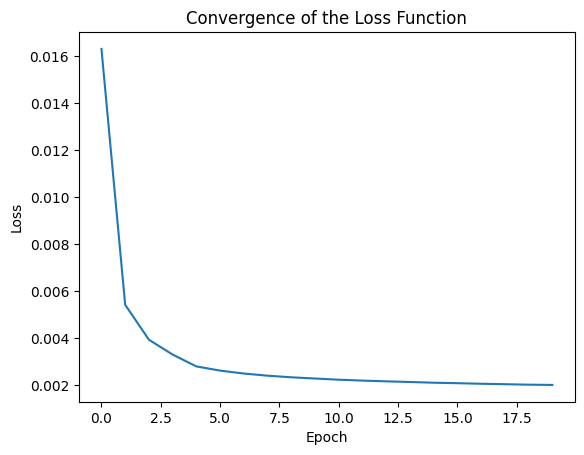

In [4]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_values.append(running_loss / (i + 1))
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Convergence of the Loss Function")
plt.show()


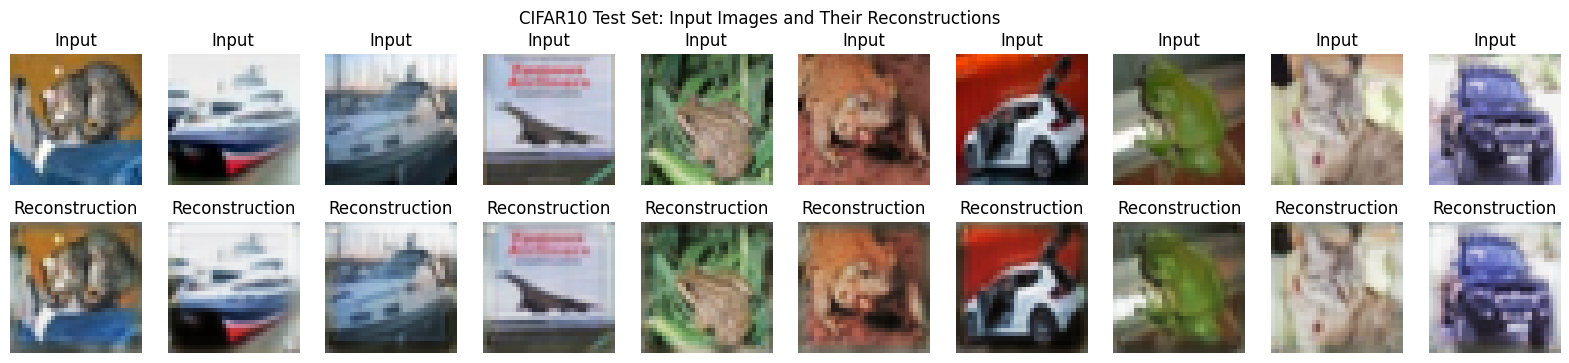

In [5]:
model.eval()
test_images, reconstructions = [], []

with torch.no_grad():
    for data in testloader:
        images, _ = data
        outputs = model(images)
        test_images.extend(images)
        reconstructions.extend(outputs)
        if len(test_images) >= 10:
            break

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

for i in range(10):
    axes[0, i].imshow(test_images[i].permute(1, 2, 0))
    axes[0, i].set_title("Input")
    axes[0, i].axis("off")
    axes[1, i].imshow(reconstructions[i].permute(1, 2, 0))
    axes[1, i].set_title("Reconstruction")
    axes[1, i].axis("off")

plt.suptitle("CIFAR10 Test Set: Input Images and Their Reconstructions")
plt.show()



#Part 2

In [6]:
def add_gaussian_noise(image, mean=0, std_dev=0.1):
    noise = torch.randn(image.size()) * std_dev + mean
    noisy_image = image + noise
    return torch.clamp(noisy_image, -1, 1)

Epoch 1, Loss: 0.0037056230646558106
Epoch 2, Loss: 0.003502558779437095
Epoch 3, Loss: 0.0034572402518242597
Epoch 4, Loss: 0.0034389987839385868
Epoch 5, Loss: 0.003418285056948662
Epoch 6, Loss: 0.003397819530684501
Epoch 7, Loss: 0.0033830335340462626
Epoch 8, Loss: 0.003370081462431699
Epoch 9, Loss: 0.003356195254717022
Epoch 10, Loss: 0.0033446341292001306
Epoch 11, Loss: 0.003334683224093169
Epoch 12, Loss: 0.0033256891504861415
Epoch 13, Loss: 0.0033115131128579377
Epoch 14, Loss: 0.0033076026760973038
Epoch 15, Loss: 0.0032993413349613546
Epoch 16, Loss: 0.0032879923852160574
Epoch 17, Loss: 0.003283591639250517
Epoch 18, Loss: 0.0032722743963822724
Epoch 19, Loss: 0.0032661052863113584
Epoch 20, Loss: 0.0032583612808957697


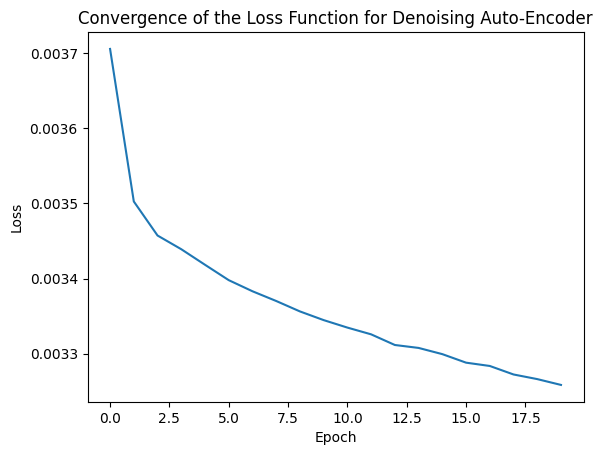

In [7]:
num_epochs = 20
loss_values_denoising = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, _ = data
        noisy_inputs = add_gaussian_noise(inputs)
        optimizer.zero_grad()
        outputs = model(noisy_inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_values_denoising.append(running_loss / (i + 1))
    print(f"Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}")

plt.plot(loss_values_denoising)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Convergence of the Loss Function for Denoising Auto-Encoder")
plt.show()


In [8]:
test_images, noisy_test_images, denoised_images = [], [], []

with torch.no_grad():
    for data in testloader:
        images, _ = data
        noisy_images = add_gaussian_noise(images)
        outputs = model(noisy_images)
        test_images.extend(images)
        noisy_test_images.extend(noisy_images)
        denoised_images.extend(outputs)
        if len(test_images) >= 10:
            break




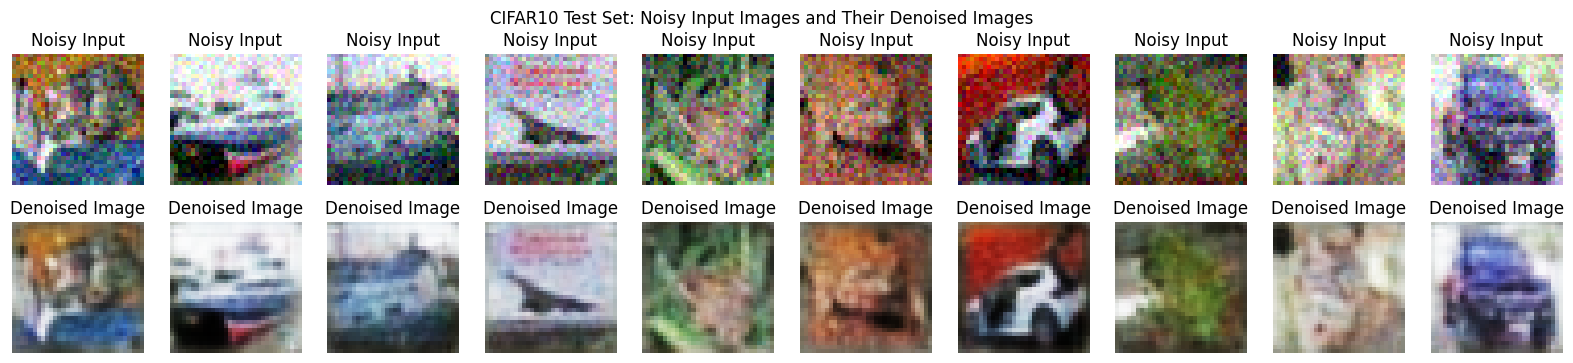

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

for i in range(10):
    axes[0, i].imshow(noisy_test_images[i].permute(1, 2, 0).clamp(0, 1))
    axes[0, i].set_title("Noisy Input")
    axes[0, i].axis("off")
    axes[1, i].imshow(denoised_images[i].permute(1, 2, 0).clamp(0, 1))
    axes[1, i].set_title("Denoised Image")
    axes[1, i].axis("off")

plt.suptitle("CIFAR10 Test Set: Noisy Input Images and Their Denoised Images")
plt.show()

In [12]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

psnr_values, ssim_values = [], []

for i in range(len(test_images)):
    original_image = test_images[i].permute(1, 2, 0).clamp(0, 1).numpy()
    denoised_image = denoised_images[i].permute(1, 2, 0).clamp(0, 1).numpy()
    psnr_values.append(psnr(original_image, denoised_image, data_range=1))
    ssim_values.append(ssim(original_image, denoised_image, multichannel=True))

mean_psnr = np.mean(psnr_values)
mean_ssim = np.mean(ssim_values)

print(f"Mean PSNR: {mean_psnr:.2f}")
print(f"Mean SSIM: {mean_ssim:.4f}")

Mean PSNR: 24.79
Mean SSIM: 0.8988


<ipython-input-12-ff86ee65fc9c>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values.append(ssim(original_image, denoised_image, multichannel=True))
